# **Tendencias electorales en Uruguay, elecciones presidenciales año 2019 correspondientes a la primera vuelta del ciclo electoral**



In [3]:
#importamos librerías
import pandas as pd
import numpy as np
import math
from scipy.optimize import minimize

from sklearn.preprocessing import LabelEncoder,MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

import pyarrow.parquet as pq
import pyarrow as pa






import warnings
warnings.filterwarnings('ignore')


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

ruta_1 = os.path.join('..', 'data', 'raw', 'Voto_circuitos_2019_UY.parquet')
ruta_2 = os.path.join("..", 'data', 'raw', 'ECH_2019_UY.parquet')

In [4]:
# Parametros de ruta:
UY_2019 = pq.read_table(ruta_1).to_pandas()
ECH_UY_2019 = pq.read_table(ruta_2).to_pandas()


# **Se indagan las características de de los resultados electorales del año 2019 en Uruguay**



In [5]:
# Muestra las principales características del DataFrame
print(UY_2019.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304175 entries, 0 to 304174
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   TipoRegistro   304175 non-null  object
 1   Departamento   304175 non-null  object
 2   CRV            304175 non-null  int64 
 3   Series         304175 non-null  object
 4   Lema           304175 non-null  object
 5   Descripcion1   304175 non-null  object
 6   CantidadVotos  304175 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 16.2+ MB
None


In [6]:
# Muestra las primeras filas del DataFrame
UY_2019.head(30)


,TipoRegistro,Departamento,CRV,Series,Lema,Descripcion1,CantidadVotos
0,HOJA_EN,MO,1,AAA,Partido Frente Amplio,9,4
1,HOJA_EN,MO,1,AAA,Partido Frente Amplio,77,3
2,HOJA_EN,MO,1,AAA,Partido Frente Amplio,90,11
3,HOJA_EN,MO,1,AAA,Partido Frente Amplio,567,1
4,HOJA_EN,MO,1,AAA,Partido Frente Amplio,609,31
5,HOJA_EN,MO,1,AAA,Partido Frente Amplio,624,4
6,HOJA_EN,MO,1,AAA,Partido Frente Amplio,711,4
7,HOJA_EN,MO,1,AAA,Partido Frente Amplio,817,2
8,HOJA_EN,MO,1,AAA,Partido Frente Amplio,871,1
9,HOJA_EN,MO,1,AAA,Partido Frente Amplio,890,1


In [ ]:
# Se visualiza la distribucion de las variables categóricas
UY_2019_cat = UY_2019.select_dtypes(include=['object'])
list(UY_2019_cat.columns)

['TipoRegistro', 'Departamento', 'Series', 'Lema', 'Descripcion1']

In [ ]:
# Se modifica el nombre de las variable 'Cantidad de Votos'
UY_2019.rename(columns = {'CantidadVotos': 'Cantidad de Votos'}, inplace = True)
print(UY_2019.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304175 entries, 0 to 304174
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   TipoRegistro       304175 non-null  object
 1   Departamento       304175 non-null  object
 2   CRV                304175 non-null  int64 
 3   Series             304175 non-null  object
 4   Lema               304175 non-null  object
 5   Descripcion1       304175 non-null  object
 6   Cantidad de Votos  304175 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 16.2+ MB
None


In [ ]:
# Sumar los votos por lema para cada lema en el conjunto de datos
total_votos_por_lema = UY_2019.groupby('Lema')['Cantidad de Votos'].sum().reset_index(name='Total de Votos')

# Mostrar los resultados
print(total_votos_por_lema)

                                        Lema  Total de Votos
0                   Partido Asamblea Popular           19728
1                    Partido Cabildo Abierto          268736
2                           Partido Colorado          300177
3                            Partido Digital            6363
4   Partido Ecologista Radical Intransigente           33461
5                      Partido Frente Amplio          949376
6                      Partido Independiente           23580
7                           Partido Nacional          696452
8                   Partido Verde Animalista           19392
9                        Partido de la Gente           26313
10               Partido de los Trabajadores            1387


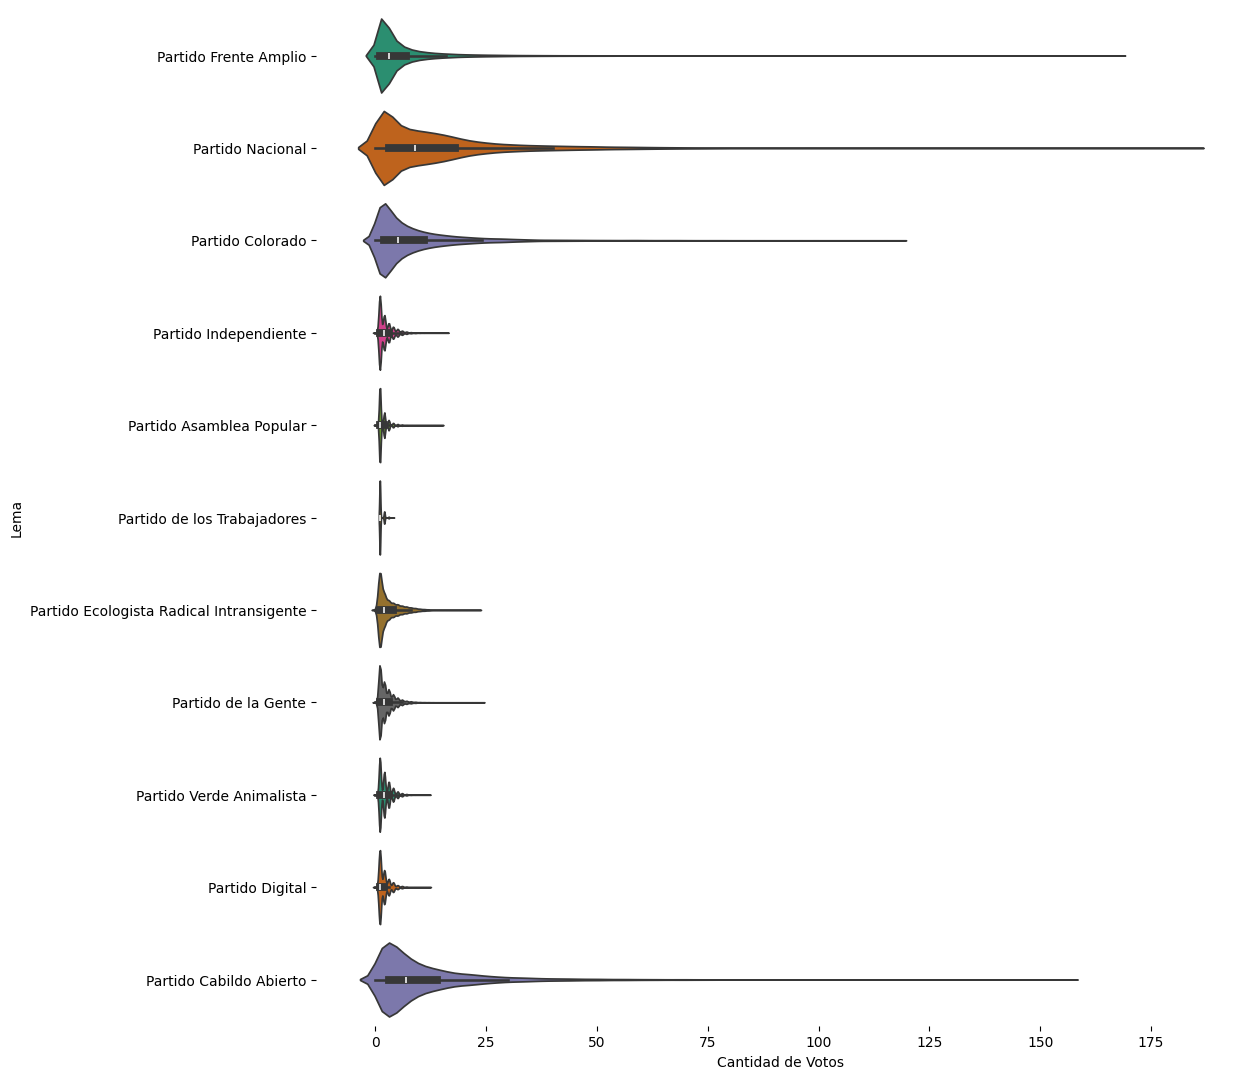

In [ ]:
figsize = (12, 1.2 * len(UY_2019['Lema'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(UY_2019, x='Cantidad de Votos', y='Lema', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

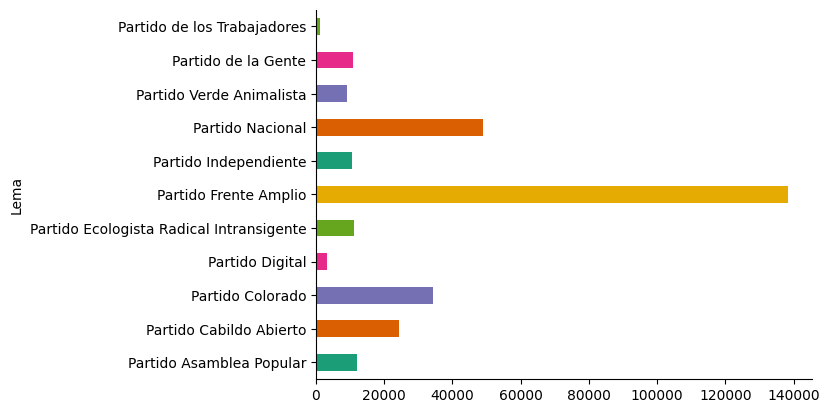

In [ ]:
UY_2019.groupby('Lema').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
lista_columnas_UY_2019= UY_2019.columns.tolist()
print(lista_columnas_UY_2019)

['TipoRegistro', 'Departamento', 'CRV', 'Series', 'Lema', 'Descripcion1', 'Cantidad de Votos']


In [ ]:
# Obtener las categorías únicas columna Departamento (2019)
categorias_unicas = UY_2019['Departamento'].unique()
print("Categorías únicas:", categorias_unicas)

Categorías únicas: ['MO' 'CA' 'MA' 'RO' 'TT' 'CL' 'RV' 'AR' 'SA' 'PA' 'RN' 'SO' 'CO' 'SJ'
 'FS' 'FD' 'DU' 'LA' 'TA']


In [ ]:
#Se modifican los nombres de las categorías estándares
nuevos_nombres = {
    'MO':'Montevideo', 'CA':'Canelones', 'MA':'Maldonado', 'RO':'Rocha', 'TT':'Treinta y Tres', 'CL':'Cerro Largo', 'RV':'Rivera', 'AR':'Artigas', 'SA':'Salto', 'PA':'Paysandú', 'RN':'Río Negro', 'SO':'Soriano', 'CO':'Colonia', 'SJ':'San José',
 'FS': 'Flores', 'FD': 'Florida', 'DU': 'Durazno', 'LA': 'Lavalleja', 'TA': 'Tacuarembó',
}
UY_2019['Departamento'] = UY_2019['Departamento'].replace(nuevos_nombres)


In [ ]:
# Se eliminan varias columnas, para generar un mejor flujo de trabajo
UY_2019 = UY_2019.drop(['TipoRegistro', 'CRV', 'Series','Descripcion1'], axis=1)
lista_columnas_UY_2019= UY_2019.columns.tolist()
print(lista_columnas_UY_2019)


['Departamento', 'Lema', 'Cantidad de Votos']


In [ ]:
lista_columnas_UY_2019= UY_2019.columns.tolist()
print(lista_columnas_UY_2019)

['Departamento', 'Lema', 'Cantidad de Votos']


In [ ]:
UY_2019

,Departamento,Lema,Cantidad de Votos
0,Montevideo,Partido Frente Amplio,4
1,Montevideo,Partido Frente Amplio,3
2,Montevideo,Partido Frente Amplio,11
3,Montevideo,Partido Frente Amplio,1
4,Montevideo,Partido Frente Amplio,31
...,...,...,...
304170,Treinta y Tres,Partido Asamblea Popular,1
304171,Treinta y Tres,Partido Cabildo Abierto,1
304172,Treinta y Tres,Partido Frente Amplio,3
304173,Treinta y Tres,Partido Colorado,1


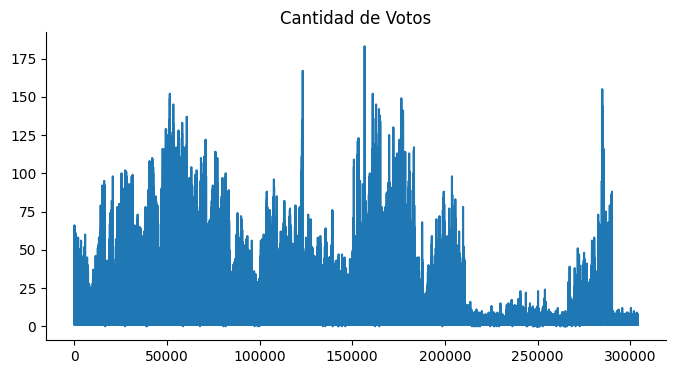

In [ ]:
from matplotlib import pyplot as plt
UY_2019['Cantidad de Votos'].plot(kind='line', figsize=(8, 4), title='Cantidad de Votos')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# Agrupar por 'Lema' y sumar las cantidades de votos
votos_por_lema = UY_2019.groupby('Lema')['Cantidad de Votos'].sum()

# Mostrar el resultado
print(votos_por_lema)

Lema
Partido Asamblea Popular                     19728
Partido Cabildo Abierto                     268736
Partido Colorado                            300177
Partido Digital                               6363
Partido Ecologista Radical Intransigente     33461
Partido Frente Amplio                       949376
Partido Independiente                        23580
Partido Nacional                            696452
Partido Verde Animalista                     19392
Partido de la Gente                          26313
Partido de los Trabajadores                   1387
Name: Cantidad de Votos, dtype: int64


In [ ]:
UY_2019

,Departamento,Lema,Cantidad de Votos
0,Montevideo,Partido Frente Amplio,4
1,Montevideo,Partido Frente Amplio,3
2,Montevideo,Partido Frente Amplio,11
3,Montevideo,Partido Frente Amplio,1
4,Montevideo,Partido Frente Amplio,31
...,...,...,...
304170,Treinta y Tres,Partido Asamblea Popular,1
304171,Treinta y Tres,Partido Cabildo Abierto,1
304172,Treinta y Tres,Partido Frente Amplio,3
304173,Treinta y Tres,Partido Colorado,1


In [ ]:
UY_2019.head()

,Departamento,Lema,Cantidad de Votos
0,Montevideo,Partido Frente Amplio,4
1,Montevideo,Partido Frente Amplio,3
2,Montevideo,Partido Frente Amplio,11
3,Montevideo,Partido Frente Amplio,1
4,Montevideo,Partido Frente Amplio,31


In [ ]:
print(UY_2019.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304175 entries, 0 to 304174
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Departamento       304175 non-null  object
 1   Lema               304175 non-null  object
 2   Cantidad de Votos  304175 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 7.0+ MB
None


# **Se indagan las características de de los resultados del Encuesta Continua de Hogares 2019 en Uruguay**

In [ ]:
# Muestra las primeras filas del DataFrame
print(ECH_UY_2019.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83482 entries, 0 to 83481
Data columns (total 18 columns):
 #   Column                                                          Non-Null Count  Dtype 
---  ------                                                          --------------  ----- 
 0   numero                                                          83482 non-null  int64 
 1   Departamento                                                    83482 non-null  object
 2   Género                                                          83482 non-null  object
 3   Edad                                                            83482 non-null  int64 
 4   Asistencia a un centro de Educación Primaria                    83482 non-null  object
 5   Finalización del nivel (Primaria)                               83482 non-null  object
 6   Asistencia a un centro de Educación Media                       83482 non-null  object
 7   Finalización del nivel (Media)                            

In [ ]:
ECH_UY_2019.head()

,numero,Departamento,Género,Edad,Asistencia a un centro de Educación Primaria,Finalización del nivel (Primaria),Asistencia a un centro de Educación Media,Finalización del nivel (Media),Asistencia a centro de Magisterio o Profesorado,Finalización del nivel (Prof.),Asistencia a un centro universitario,Finalización del nivel (Univ.),Asistencia a un centro de educación terciaria no universitaria,Finalización del nivel (Terciario),Asistencia a un centro de Educación Técnica,Finalización del nivel (Técnico),Frecuencia de utilización de internet,Categoría de la ocupación
0,2019000001,Rocha,Mujer,76,"Sí, asistió",No,0,0,0,0,0,0,0,0,No asistió,0,0,0
1,2019000001,Rocha,Mujer,22,"Sí, asistió",Sí,"Sí, asistió",Sí,No asistió,0,No asistió,0,No asistió,0,No asistió,0,Al menos una vez al día,0
2,2019000002,Salto,Hombre,65,"Sí, asistió",Sí,"Sí, asistió",Sí,No asistió,0,No asistió,0,No asistió,0,"Sí, asistió",Sí,Al menos una vez al día,Cuenta propia con local o inversión
3,2019000002,Salto,Mujer,59,"Sí, asistió",Sí,No asistió,0,0,0,0,0,0,0,No asistió,0,Al menos una vez al día,Asalariado/a privado/a
4,2019000003,Montevideo,Mujer,32,"Sí, asistió",Sí,"Sí, asistió",No,0,0,0,0,0,0,No asistió,0,Al menos una vez al día,Asalariado/a privado/a


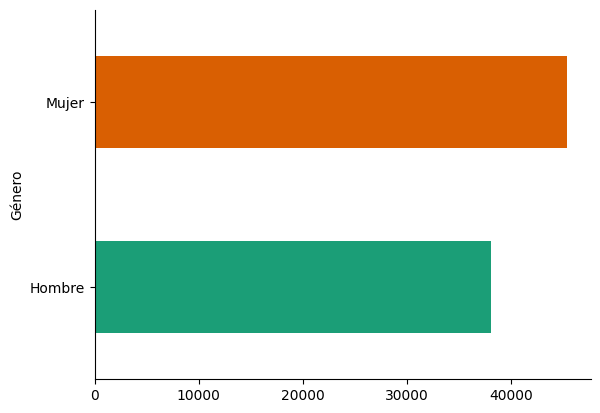

In [ ]:
# Univariable Género (ECH_2019)

ECH_UY_2019.groupby('Género').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
non_numeric_cols = ECH_UY_2019.select_dtypes(include='object').columns
print(non_numeric_cols)

Index(['Departamento', 'Género',
       'Asistencia a un centro de Educación Primaria',
       'Finalización del nivel (Primaria)',
       'Asistencia a un centro de Educación Media',
       'Finalización del nivel (Media)',
       'Asistencia a centro de Magisterio o Profesorado',
       'Finalización del nivel (Prof.)',
       'Asistencia a un centro universitario',
       'Finalización del nivel (Univ.)',
       'Asistencia a un centro de educación terciaria no universitaria',
       'Finalización del nivel (Terciario)',
       'Asistencia a un centro de Educación Técnica',
       'Finalización del nivel (Técnico)',
       'Frecuencia de utilización de internet', 'Categoría de la ocupación'],
      dtype='object')


In [ ]:
# Se contean los nulos de cada columna con isnull().sum()
ECH_UY_2019.isnull().sum()

numero                                                            0
Departamento                                                      0
Género                                                            0
Edad                                                              0
Asistencia a un centro de Educación Primaria                      0
Finalización del nivel (Primaria)                                 0
Asistencia a un centro de Educación Media                         0
Finalización del nivel (Media)                                    0
Asistencia a centro de Magisterio o Profesorado                   0
Finalización del nivel (Prof.)                                    0
Asistencia a un centro universitario                              0
Finalización del nivel (Univ.)                                    0
Asistencia a un centro de educación terciaria no universitaria    0
Finalización del nivel (Terciario)                                0
Asistencia a un centro de Educación Técnica     

In [ ]:
# Se identifican duplicados
ECH_UY_2019[ECH_UY_2019.duplicated(keep=False)]

,numero,Departamento,Género,Edad,Asistencia a un centro de Educación Primaria,Finalización del nivel (Primaria),Asistencia a un centro de Educación Media,Finalización del nivel (Media),Asistencia a centro de Magisterio o Profesorado,Finalización del nivel (Prof.),Asistencia a un centro universitario,Finalización del nivel (Univ.),Asistencia a un centro de educación terciaria no universitaria,Finalización del nivel (Terciario),Asistencia a un centro de Educación Técnica,Finalización del nivel (Técnico),Frecuencia de utilización de internet,Categoría de la ocupación
2707,2019001848,Montevideo,Hombre,25,"Sí, asistió",Sí,No asistió,0,0,0,0,0,0,0,No asistió,0,Al menos una vez al día,Asalariado/a privado/a
2709,2019001848,Montevideo,Hombre,25,"Sí, asistió",Sí,No asistió,0,0,0,0,0,0,0,No asistió,0,Al menos una vez al día,Asalariado/a privado/a
3360,2019002316,Colonia,Mujer,64,"Sí, asistió",Sí,No asistió,0,0,0,0,0,0,0,No asistió,0,0,0
3361,2019002316,Colonia,Mujer,64,"Sí, asistió",Sí,No asistió,0,0,0,0,0,0,0,No asistió,0,0,0
3905,2019002721,Montevideo,Mujer,49,"Sí, asistió",Sí,"Sí, asistió",Sí,No asistió,0,No asistió,0,No asistió,0,No asistió,0,Al menos una vez al día,Asalariado/a público/a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78235,2019054398,Montevideo,Mujer,21,"Sí, asistió",Sí,"Sí, asistió",Sí,No asistió,0,Asiste actualmente,0,No asistió,0,No asistió,0,Al menos una vez al día,0
80743,2019056163,Paysandú,Hombre,20,"Sí, asistió",Sí,No asistió,0,0,0,0,0,0,0,No asistió,0,Al menos una vez al día,Asalariado/a privado/a
80745,2019056163,Paysandú,Hombre,20,"Sí, asistió",Sí,No asistió,0,0,0,0,0,0,0,No asistió,0,Al menos una vez al día,Asalariado/a privado/a
82771,2019057568,Montevideo,Hombre,19,"Sí, asistió",Sí,Asiste actualmente,0,0,0,0,0,0,0,No asistió,0,Al menos una vez al día,0


In [ ]:
print(ECH_UY_2019.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83482 entries, 0 to 83481
Data columns (total 18 columns):
 #   Column                                                          Non-Null Count  Dtype 
---  ------                                                          --------------  ----- 
 0   numero                                                          83482 non-null  int64 
 1   Departamento                                                    83482 non-null  object
 2   Género                                                          83482 non-null  object
 3   Edad                                                            83482 non-null  int64 
 4   Asistencia a un centro de Educación Primaria                    83482 non-null  object
 5   Finalización del nivel (Primaria)                               83482 non-null  object
 6   Asistencia a un centro de Educación Media                       83482 non-null  object
 7   Finalización del nivel (Media)                            

In [ ]:
# Se elimina los duplicados con drop_duplicates() y se revisa el numero de filas del nuevo dataset
ECH_UY_2019.drop_duplicates(inplace=True)
ECH_UY_2019.shape

(83430, 18)

In [ ]:
# Se visualiza la distribucion de las variables categóricas
ECH_cat = ECH_UY_2019.select_dtypes(include=['object'])
list(ECH_cat.columns)

['Departamento',
 'Género',
 'Asistencia a un centro de Educación Primaria',
 'Finalización del nivel (Primaria)',
 'Asistencia a un centro de Educación Media',
 'Finalización del nivel (Media)',
 'Asistencia a centro de Magisterio o Profesorado',
 'Finalización del nivel (Prof.)',
 'Asistencia a un centro universitario',
 'Finalización del nivel (Univ.)',
 'Asistencia a un centro de educación terciaria no universitaria',
 'Finalización del nivel (Terciario)',
 'Asistencia a un centro de Educación Técnica',
 'Finalización del nivel (Técnico)',
 'Frecuencia de utilización de internet',
 'Categoría de la ocupación']

In [ ]:
df_ECH_UY_2019 = pd.DataFrame(ECH_UY_2019)

# Crear una función para determinar la categoría educativa
def determinar_categoria_educativa(row):
    if row['Finalización del nivel (Univ.)'] == 'Sí':
        return 'Universitario'
    elif row['Finalización del nivel (Prof.)'] == 'Sí':
        return 'Profesional'
    elif row['Finalización del nivel (Terciario)'] == 'Sí':
        return 'Terciario'
    elif row['Finalización del nivel (Técnico)'] == 'Sí':
        return 'Técnico'
    elif row['Finalización del nivel (Media)'] == 'Sí':
        return 'Media'
    elif row['Finalización del nivel (Primaria)'] == 'Sí':
        return 'Primaria'
    else:
        return 'Sin educación formal'

# Aplicar la función a cada fila del DataFrame
ECH_UY_2019['Nivel Educativo'] = ECH_UY_2019.apply(determinar_categoria_educativa, axis=1)

# Mostrar el DataFrame resultante
print(ECH_UY_2019[['numero', 'Departamento', 'Género', 'Nivel Educativo','Frecuencia de utilización de internet', 'Categoría de la ocupación']])

           numero Departamento  Género       Nivel Educativo  \
0      2019000001        Rocha   Mujer  Sin educación formal   
1      2019000001        Rocha   Mujer                 Media   
2      2019000002        Salto  Hombre               Técnico   
3      2019000002        Salto   Mujer              Primaria   
4      2019000003   Montevideo   Mujer              Primaria   
...           ...          ...     ...                   ...   
83477  2019058053     Paysandú  Hombre              Primaria   
83478  2019058053     Paysandú   Mujer  Sin educación formal   
83479  2019058054   Montevideo   Mujer              Primaria   
83480  2019058054   Montevideo  Hombre              Primaria   
83481  2019058054   Montevideo  Hombre               Técnico   

      Frecuencia de utilización de internet  \
0                                         0   
1                   Al menos una vez al día   
2                   Al menos una vez al día   
3                   Al menos una vez al día

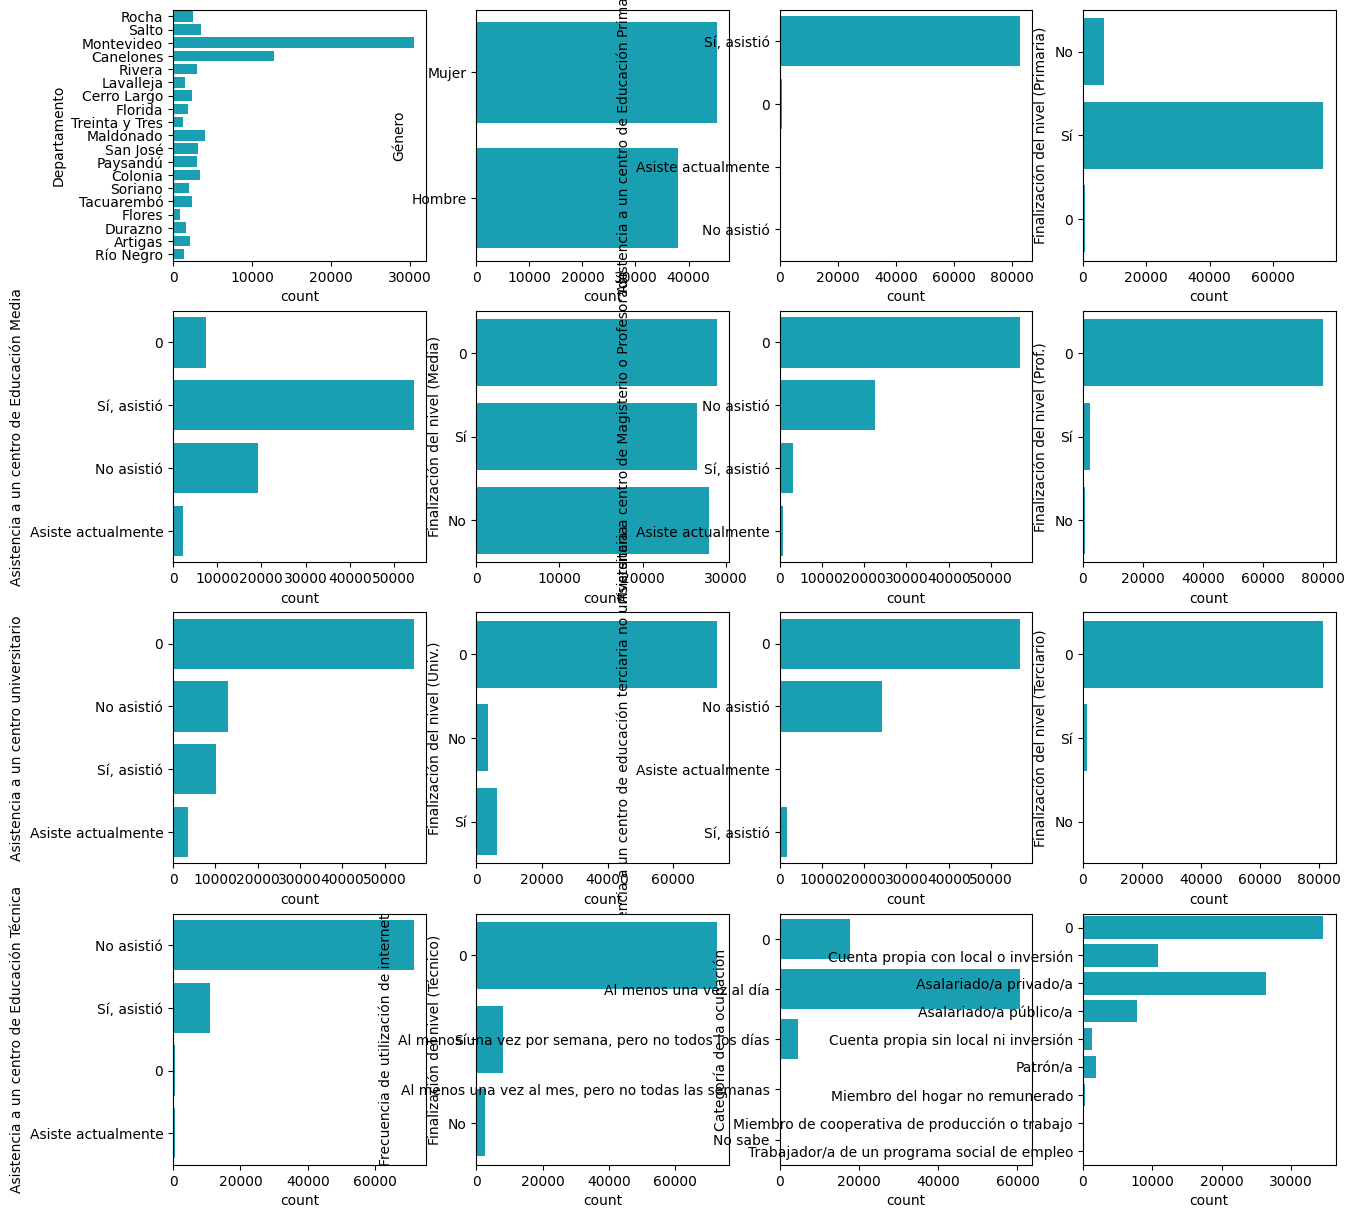

In [ ]:
# Se visualizan los univariables del ECH 2019 en URUGUAY
plt.figure(figsize=(15, 15))
features = ECH_cat.columns
for i in enumerate(features):
    ax = plt.subplot(4, 4, i[0]+1)
    sns.countplot(ECH_cat[i[1]], color = '#00b2ca')
    #plt.xticks(rotation=20)
plt.show()

In [ ]:
lista_columnas_ECH_UY_2019= ECH_UY_2019.columns.tolist()
print(lista_columnas_ECH_UY_2019)

['numero', 'Departamento', 'Género', 'Edad', 'Asistencia a un centro de Educación Primaria', 'Finalización del nivel (Primaria)', 'Asistencia a un centro de Educación Media', 'Finalización del nivel (Media)', 'Asistencia a centro de Magisterio o Profesorado', 'Finalización del nivel (Prof.)', 'Asistencia a un centro universitario', 'Finalización del nivel (Univ.)', 'Asistencia a un centro de educación terciaria no universitaria', 'Finalización del nivel (Terciario)', 'Asistencia a un centro de Educación Técnica', 'Finalización del nivel (Técnico)', 'Frecuencia de utilización de internet', 'Categoría de la ocupación', 'Nivel Educativo']


In [ ]:
# Se eliminan varias columnas, para generar un mejor flujo de trabajo
ECH_UY_2019 = ECH_UY_2019.drop(['Finalización del nivel (Primaria)', 'Finalización del nivel (Media)', 'Finalización del nivel (Prof.)', 'Finalización del nivel (Univ.)', 'Finalización del nivel (Terciario)', 'Finalización del nivel (Técnico)'], axis=1)

In [ ]:
# Se visualiza la distribucion de todas las variables numéricas
ECH_UY_num = ECH_UY_2019.select_dtypes(include=['int64','float64'])
list(ECH_UY_num.columns)

['numero', 'Edad']

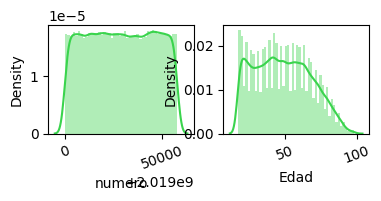

In [ ]:
# Se visualiza la distribucion de todas las variables
# numéricasplt.figure(figsize=(15, 15))
features = ECH_UY_num.columns[0:]
for i in enumerate(features):
    ax = plt.subplot(3, 3, i[0]+1)
    sns.distplot(ECH_UY_num[i[1]],color = '#3AD44D')
    plt.xticks(rotation=20)

In [ ]:
# Función para categorizar las edades
def categorizar_edad(edad):
    if 18 <= edad <= 34:
        return 'Joven (18-34)'
    elif 35 <= edad <= 59:
        return 'Adulto (35-59)'
    elif edad >= 60:
        return 'Mayor (60+)'
    else:
        return 'Otro'  # En caso de que haya edades fuera del rango esperado

# Aplicar la función a la columna de edades para crear una nueva columna 'Edad_Categoria'
ECH_UY_2019['Edad_Categoria'] = ECH_UY_2019['Edad'].apply(categorizar_edad)

# Verifica los resultados
print(ECH_UY_2019[['Edad', 'Edad_Categoria']].head())

# Calculamos proporciones de las nuevas categorías de edad
def calcular_proporciones(df, columna):
    return df.groupby(['Departamento', columna]).size().unstack(fill_value=0).apply(lambda x: x / x.sum(), axis=1)

edad_categoria_prop = calcular_proporciones(ECH_UY_2019, 'Edad_Categoria')


   Edad  Edad_Categoria
0    76     Mayor (60+)
1    22   Joven (18-34)
2    65     Mayor (60+)
3    59  Adulto (35-59)
4    32   Joven (18-34)


In [ ]:
# Se elimina la columna Edad, para generar un mejor flujo de trabajo
ECH_UY_2019 = ECH_UY_2019.drop(['Edad'], axis=1)

In [ ]:
ECH_UY_2019

,numero,Departamento,Género,Asistencia a un centro de Educación Primaria,Asistencia a un centro de Educación Media,Asistencia a centro de Magisterio o Profesorado,Asistencia a un centro universitario,Asistencia a un centro de educación terciaria no universitaria,Asistencia a un centro de Educación Técnica,Frecuencia de utilización de internet,Categoría de la ocupación,Nivel Educativo,Edad_Categoria
0,2019000001,Rocha,Mujer,"Sí, asistió",0,0,0,0,No asistió,0,0,Sin educación formal,Mayor (60+)
1,2019000001,Rocha,Mujer,"Sí, asistió","Sí, asistió",No asistió,No asistió,No asistió,No asistió,Al menos una vez al día,0,Media,Joven (18-34)
2,2019000002,Salto,Hombre,"Sí, asistió","Sí, asistió",No asistió,No asistió,No asistió,"Sí, asistió",Al menos una vez al día,Cuenta propia con local o inversión,Técnico,Mayor (60+)
3,2019000002,Salto,Mujer,"Sí, asistió",No asistió,0,0,0,No asistió,Al menos una vez al día,Asalariado/a privado/a,Primaria,Adulto (35-59)
4,2019000003,Montevideo,Mujer,"Sí, asistió","Sí, asistió",0,0,0,No asistió,Al menos una vez al día,Asalariado/a privado/a,Primaria,Joven (18-34)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
83477,2019058053,Paysandú,Hombre,"Sí, asistió",No asistió,0,0,0,No asistió,0,0,Primaria,Mayor (60+)
83478,2019058053,Paysandú,Mujer,"Sí, asistió",0,0,0,0,No asistió,0,0,Sin educación formal,Mayor (60+)
83479,2019058054,Montevideo,Mujer,"Sí, asistió",No asistió,0,0,0,No asistió,Al menos una vez al día,Asalariado/a privado/a,Primaria,Adulto (35-59)
83480,2019058054,Montevideo,Hombre,"Sí, asistió",No asistió,0,0,0,No asistió,Al menos una vez al día,Asalariado/a privado/a,Primaria,Joven (18-34)


**Optimizar los tipos de datos**: Se realiza la optimización de parametros para mejorar el modelado considerando la gran cantidad de información



In [ ]:
# Optimizar los tipos de datos
def optimize_dtypes(df):
    for col in df.select_dtypes(include=['int']).columns:
        df[col] = pd.to_numeric(df[col], downcast='integer')
    for col in df.select_dtypes(include=['float']).columns:
        df[col] = pd.to_numeric(df[col], downcast='float')
    for col in df.select_dtypes(include=['object']).columns:
        num_unique_values = len(df[col].unique())
        num_total_values = len(df[col])
        if num_unique_values / num_total_values < 0.5:
            df[col] = df[col].astype('category')
    return df

ECH_UY_2019 = optimize_dtypes(ECH_UY_2019)
UY_2019 = optimize_dtypes(UY_2019)

In [ ]:
# Columnas a eliminar
columns_to_drop = [
    'Asistencia a un centro de Educación Primaria',
       'Asistencia a un centro de Educación Media',
       'Asistencia a centro de Magisterio o Profesorado',
       'Asistencia a un centro universitario',
       'Asistencia a un centro de educación terciaria no universitaria',
       'Asistencia a un centro de Educación Técnica',
]

# Eliminar las columnas en UY_2019 y ECH_UY_2019
ECH_UY_2019.drop(columns=columns_to_drop, inplace=True)

# Verificar la eliminación de columnas
print(UY_2019.columns)
print(ECH_UY_2019.columns)


Index(['Departamento', 'Lema', 'Cantidad de Votos'], dtype='object')
Index(['numero', 'Departamento', 'Género',
       'Frecuencia de utilización de internet', 'Categoría de la ocupación',
       'Nivel Educativo', 'Edad_Categoria'],
      dtype='object')


# **Se aplica la relación entre el la Encuesta Continua de Hogares 2019 y los resultados electorales de las elecciones presidenciales del año 2019 en Uruguay, mediante el calculo de proporciones** (*modelo de inferencia ecológica de King)*

                 Media  Primaria  Profesional  Sin educación formal  \
Departamento                                                          
Artigas       0.128265  0.592817     0.035914              0.135261   
Canelones     0.161918  0.566436     0.023457              0.099418   
Cerro Largo   0.113646  0.580855     0.032587              0.145010   
Colonia       0.144575  0.623754     0.033724              0.078299   
Durazno       0.115177  0.603479     0.027594              0.120576   

              Terciario   Técnico  Universitario  Al menos una vez al día  \
Departamento                                                                
Artigas        0.010728  0.076493       0.020522                 0.598881   
Canelones      0.014326  0.078952       0.055494                 0.754251   
Cerro Largo    0.008147  0.099389       0.020367                 0.566191   
Colonia        0.014956  0.076833       0.027859                 0.664516   
Durazno        0.007199  0.096581       

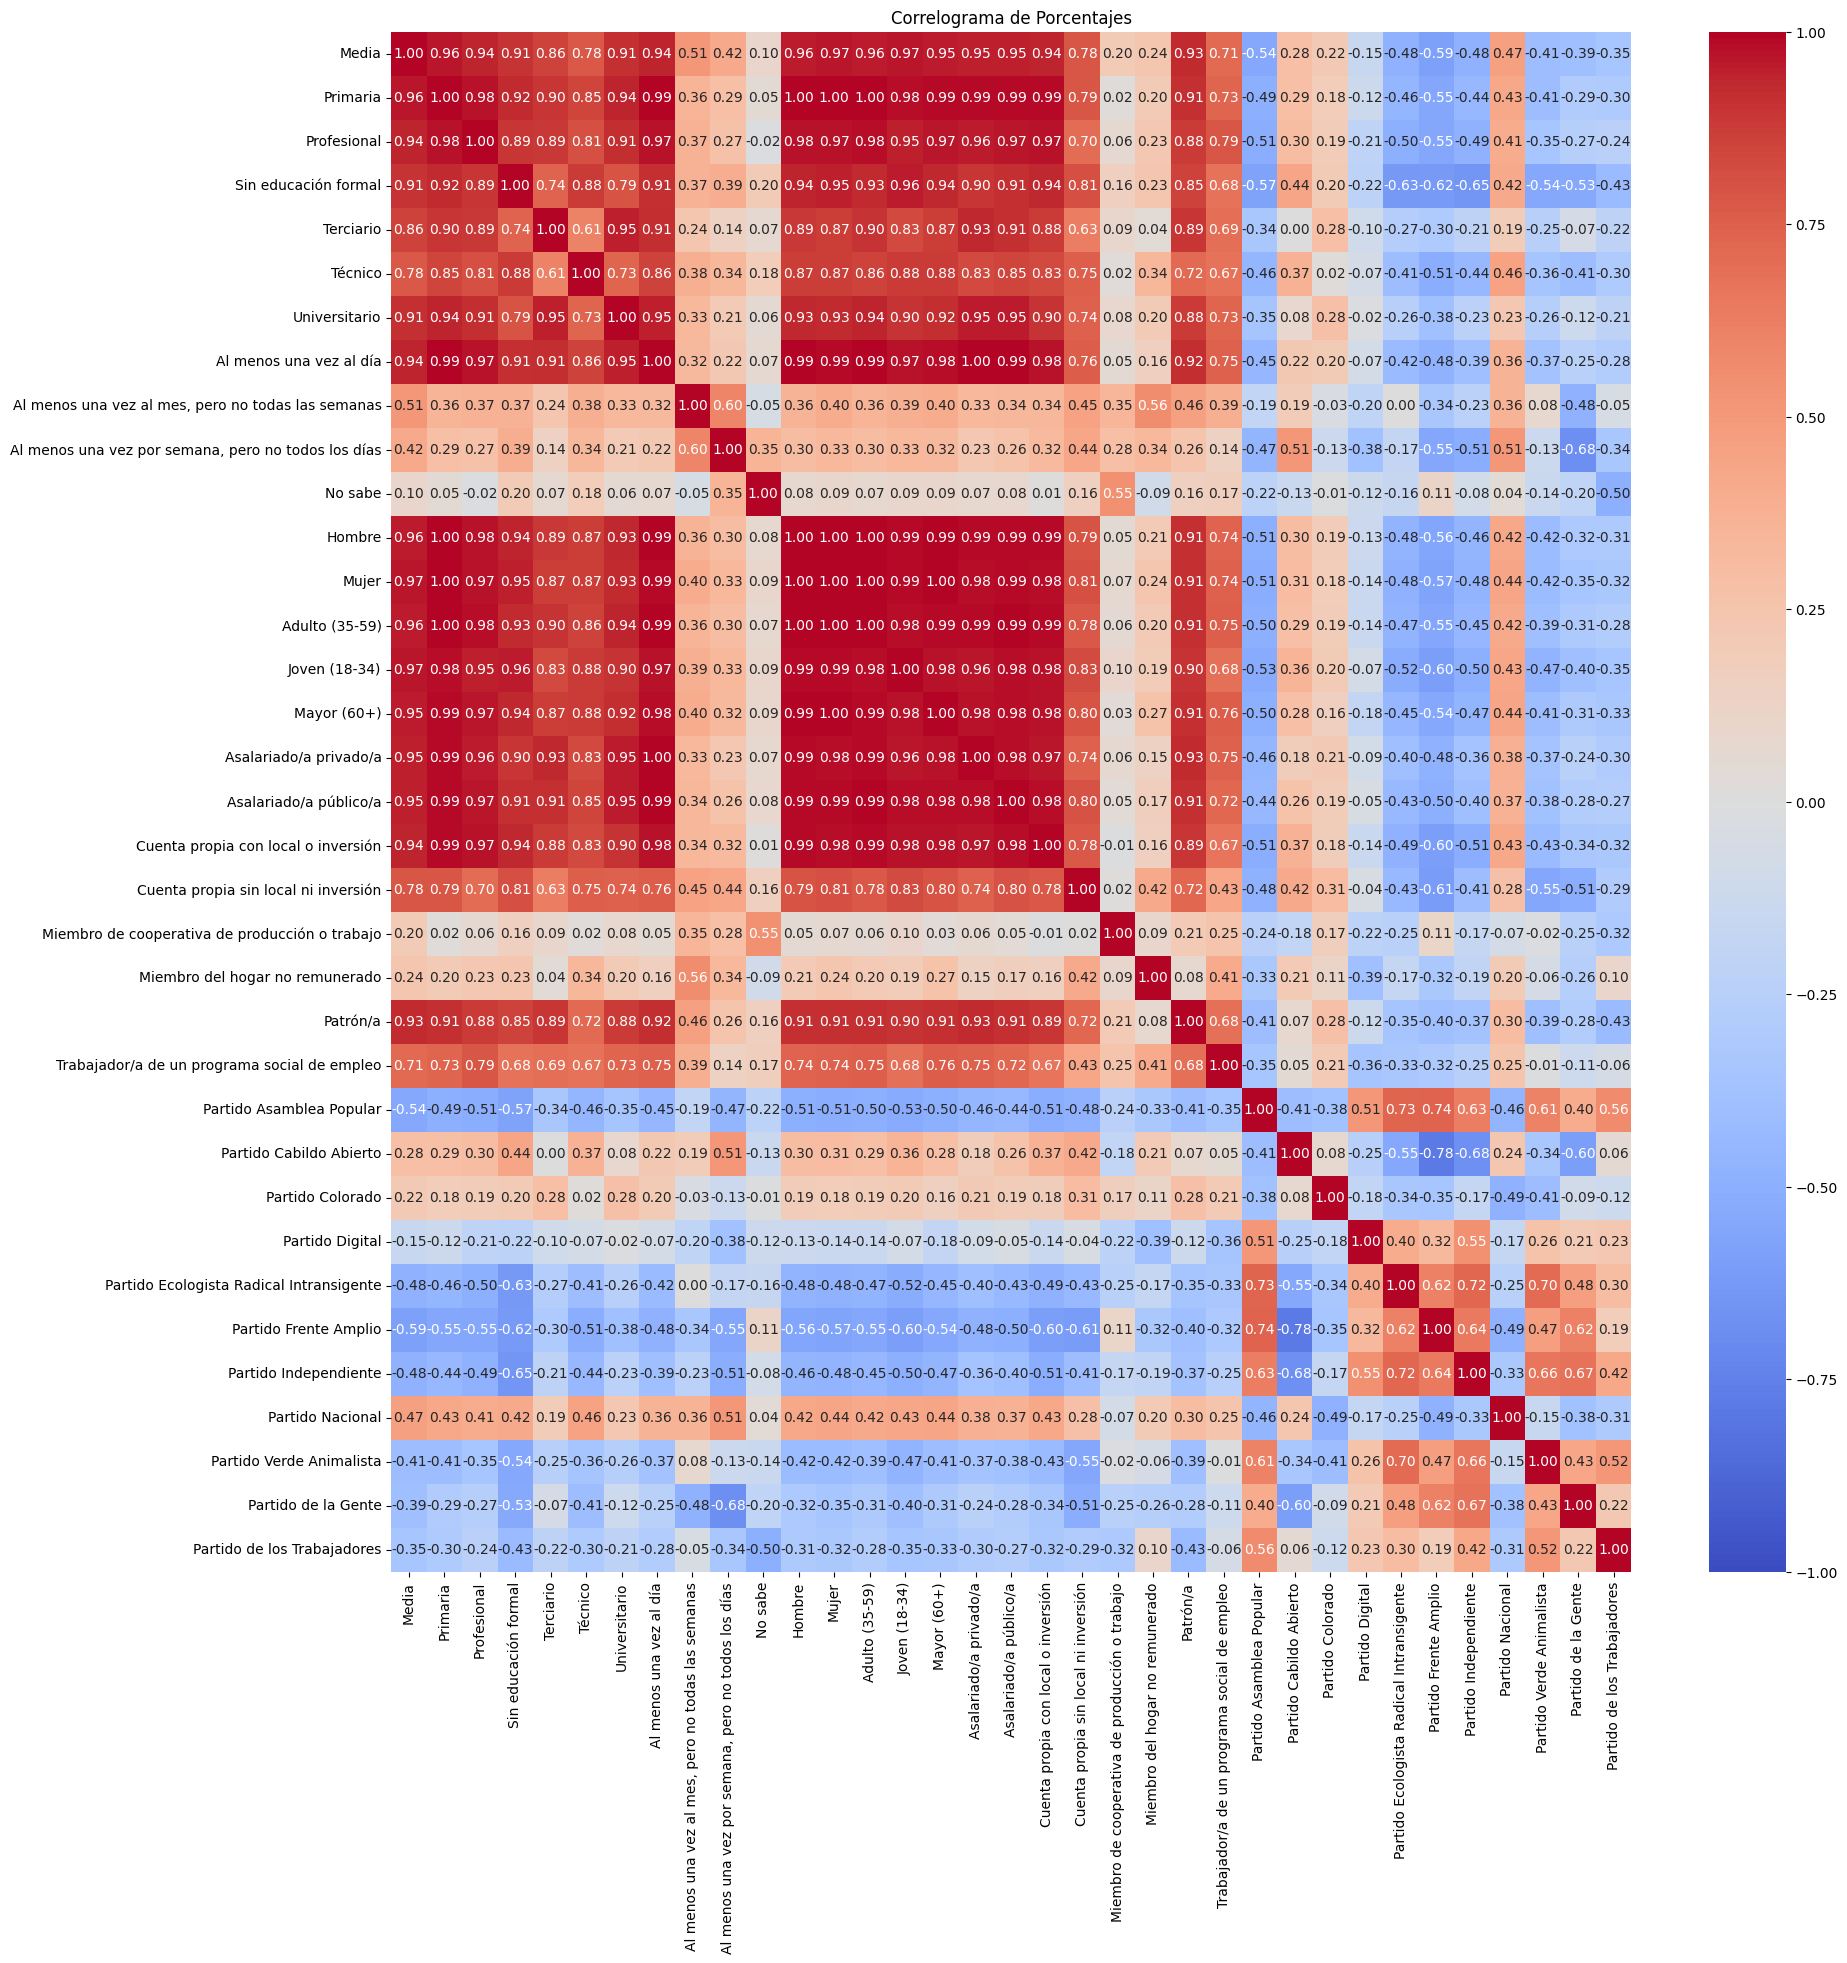

In [ ]:
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
import statsmodels.api as sm


# Función para calcular proporciones de una característica en cada departamento
def calcular_proporciones(df, columna):
    return df.groupby(['Departamento', columna]).size().unstack(fill_value=0).apply(lambda x: x / x.sum(), axis=1)

# Calculamos proporciones de las características demográficas
nivel_educativo_prop = calcular_proporciones(ECH_UY_2019, 'Nivel Educativo')
internet_prop = calcular_proporciones(ECH_UY_2019, 'Frecuencia de utilización de internet')
genero_prop = calcular_proporciones(ECH_UY_2019, 'Género')
edad_prop = calcular_proporciones(ECH_UY_2019, 'Edad_Categoria')
ocupacion_prop = calcular_proporciones(ECH_UY_2019, 'Categoría de la ocupación')

# Concatenamos las proporciones en un solo DataFrame
ECH_agg = pd.concat([nivel_educativo_prop, internet_prop, genero_prop, edad_prop, ocupacion_prop], axis=1).fillna(0)

# Agregación de datos de votos por departamento y lema
votos_agg = UY_2019.groupby(['Departamento', 'Lema'])['Cantidad de Votos'].sum().unstack(fill_value=0)

# Combinación de ambas bases de datos en un solo DataFrame
combined_data = ECH_agg.join(votos_agg, on='Departamento')

# Eliminar columnas cuyo nombre es '0'
combined_data = combined_data.loc[:, combined_data.columns != '0']

print(combined_data.head())

# Dividir el DataFrame en conjuntos de entrenamiento y prueba
train_data, test_data = train_test_split(combined_data, test_size=0.3, random_state=42)

# Función para calcular porcentajes entre columnas
def calculate_percentages(df):
    # Calcular el total para cada fila
    row_totals = df.sum(axis=1)

    # Dividir cada valor de columna por el total de la fila para obtener porcentajes
    df_percentages = df.div(row_totals, axis=0) * 100

    # Calcular la matriz de correlación basada en porcentajes
    correlation_matrix = df_percentages.corr()
    return correlation_matrix

# Función para graficar el correlograma
def plot_correlogram(correlation_matrix):
    plt.figure(figsize=(20, 20))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
    plt.title('Correlograma de Porcentajes')
    plt.show()

# Generar correlograma
def generate_correlogram(df):
    correlation_matrix = calculate_percentages(df)
    plot_correlogram(correlation_matrix)

# Generar y mostrar el correlograma para los datos combinados
generate_correlogram(combined_data)

# Análisis Multivariable con Plotly
def plot_multivariable_analysis(df, target_col):
    fig = go.Figure()
    for col in df.columns:
        if col != target_col:
            # Ajustar la regresión lineal
            X = df[[col]]
            X = sm.add_constant(X)
            y = df[target_col]
            model = sm.OLS(y, X).fit()

            # Predicciones
            df['predicted'] = model.predict(X)

            # Añadir scatter plot y línea de regresión
            fig.add_trace(go.Scatter(x=df[col], y=df[target_col], mode='markers', name=f'Observaciones {col}'))
            fig.add_trace(go.Scatter(x=df[col], y=df['predicted'], mode='lines', name=f'Predicción {col}'))

    fig.update_layout(title=f'Análisis Multivariable con {target_col}',
                      xaxis_title='Variables',
                      yaxis_title=target_col)

    return fig

# Generar y mostrar el análisis multivariable para "Partido Frente Amplio"
multivariable_analysis_fig_fa = plot_multivariable_analysis(combined_data, 'Partido Frente Amplio')
multivariable_analysis_fig_fa.show()

# Generar y mostrar el análisis multivariable para "Partido Nacional"
multivariable_analysis_fig_pn = plot_multivariable_analysis(combined_data, 'Partido Nacional')
multivariable_analysis_fig_pn.show()


In [ ]:
from sklearn.metrics import silhouette_score

# Calcular el Silhouette Score
silhouette_avg = silhouette_score(scaled_features, clusters)
print(f'Silhouette Score: {silhouette_avg}')


Silhouette Score: 0.08093219939496726


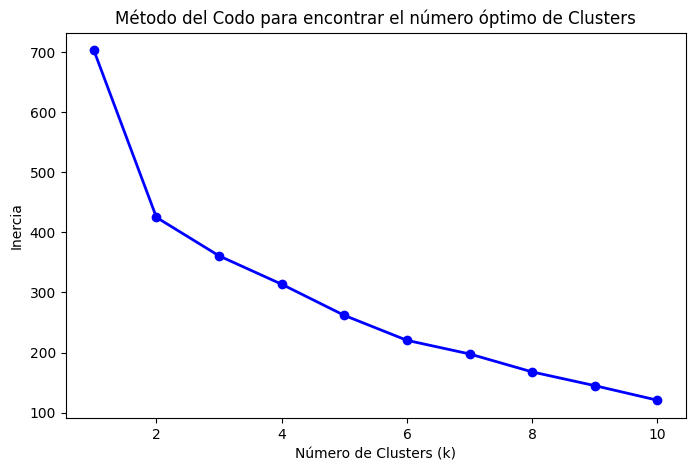

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt



# Seleccionar las columnas relevantes para el clustering
columns = ['Media', 'Primaria', 'Profesional', 'Sin educación formal', 'Terciario',
           'Técnico', 'Universitario', 'Al menos una vez al día', 'Al menos una vez al mes, pero no todas las semanas',
           'Al menos una vez por semana, pero no todos los días', 'No sabe', 'Hombre', 'Mujer', 'Adulto (35-59)',
           'Joven (18-34)', 'Mayor (60+)', 'Asalariado/a privado/a', 'Asalariado/a público/a',
           'Cuenta propia con local o inversión', 'Cuenta propia sin local ni inversión',
           'Miembro de cooperativa de producción o trabajo', 'Miembro del hogar no remunerado',
           'Patrón/a', 'Trabajador/a de un programa social de empleo', 'Partido Asamblea Popular',
           'Partido Cabildo Abierto', 'Partido Colorado', 'Partido Digital',
           'Partido Ecologista Radical Intransigente', 'Partido Frente Amplio',
           'Partido Independiente', 'Partido Nacional', 'Partido Verde Animalista',
           'Partido de la Gente', 'Partido de los Trabajadores', 'PCA1', 'PCA2']

# Filtrar el DataFrame con las columnas seleccionadas
data_filtered = combined_data[columns]

# Normalizar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_filtered)

# Aplicar el método del codo
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, 'bo-', linewidth=2)
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo para encontrar el número óptimo de Clusters')
plt.show()


In [ ]:
# Preprocesamiento de datos
features = combined_data.drop(columns=['Partido Frente Amplio', 'Partido Nacional'])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_data = pd.DataFrame(scaled_features, columns=features.columns)
scaled_data['Partido Frente Amplio'] = combined_data['Partido Frente Amplio']
scaled_data['Partido Nacional'] = combined_data['Partido Nacional']

# Entrenamiento del modelo de clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)
combined_data['Cluster'] = clusters

# Evaluación del Silhouette Score
silhouette_avg = silhouette_score(scaled_features, clusters)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.12098369384709787


In [ ]:
# Separar los datos por cluster
cluster_0 = combined_data[combined_data['Cluster'] == 0]
cluster_1 = combined_data[combined_data['Cluster'] == 1]
cluster_2 = combined_data[combined_data['Cluster'] == 2]


# Calcular las medias de las características para cada cluster
cluster_0_mean = cluster_0.mean()
cluster_1_mean = cluster_1.mean()
cluster_2_mean = cluster_2.mean()


print("Características del Cluster 0")
print(cluster_0_mean)
print("\nCaracterísticas del Cluster 1")
print(cluster_1_mean)
print("\nCaracterísticas del Cluster 2")
print(cluster_2_mean)


Características del Cluster 0
Media                                                      0.116359
Primaria                                                   0.587561
Profesional                                                0.032065
Sin educación formal                                       0.133316
Terciario                                                  0.008091
Técnico                                                    0.096006
Universitario                                              0.026603
Al menos una vez al día                                    0.629789
Al menos una vez al mes, pero no todas las semanas         0.003538
Al menos una vez por semana, pero no todos los días        0.071177
No sabe                                                    0.000153
Hombre                                                     0.460161
Mujer                                                      0.539839
Adulto (35-59)                                             0.403341
Joven (18-34)     

In [ ]:
import plotly.graph_objects as go

# Datos de los clusters
variables = ['Primaria', 'Profesional', 'Sin educación formal', 'Terciario', 'Técnico', 'Universitario',
              'Al menos una vez al día', 'Al menos una vez al mes, pero no todas las semanas',
              'Al menos una vez por semana, pero no todos los días', 'No sabe', 'Hombre', 'Mujer',
              'Adulto (35-59)', 'Joven (18-34)', 'Mayor (60+)', 'Asalariado/a privado/a',
              'Asalariado/a público/a', 'Cuenta propia con local o inversión',
              'Cuenta propia sin local ni inversión', 'Miembro de cooperativa de producción o trabajo',
              'Miembro del hogar no remunerado', 'Patrón/a', 'Trabajador/a de un programa social de empleo']

# Datos de cada cluster (valores convertidos a porcentaje)
cluster_0 = [58.7561, 3.2065, 13.3316, 0.8091, 9.6006, 2.6603, 62.9789, 0.3538, 7.1177, 0.0153,
             46.0161, 53.9839, 40.3341, 27.2190, 32.4469, 25.4001, 9.3043, 15.3748, 2.7058,
             0.0369, 0.5565, 0.0802]
cluster_1 = [58.7265, 3.2372, 10.7102, 1.3445, 9.4516, 3.8657, 70.9737, 0.2987, 5.4713, 0.0348,
             46.7381, 53.2619, 42.1654, 26.3232, 31.5114, 30.7442, 9.2082, 13.4922, 1.4194,
             0.4521, 0.1280, 0.1280]
cluster_2 = [43.4900, 2.6881, 4.8998, 2.4548, 9.8061, 14.3017, 80.3549, 0.3911, 3.9533, 0.0723,
             44.2852, 55.7148, 40.1282, 28.2912, 31.5807, 35.5209, 10.2859, 1.0023, 0.3211,
             0.0048, 0.0000, 0.0427]

# Crear el gráfico
fig = go.Figure()

# Añadir barras para el Cluster 0
fig.add_trace(go.Bar(
    x=variables,
    y=cluster_0,
    name='Cluster 0',
    marker_color='blue'
))

# Añadir barras para el Cluster 1
fig.add_trace(go.Bar(
    x=variables,
    y=cluster_1,
    name='Cluster 1',
    marker_color='red'
))

# Añadir barras para el Cluster 2
fig.add_trace(go.Bar(
    x=variables,
    y=cluster_2,
    name='Cluster 2',
    marker_color='green'
))

# Actualizar el diseño del gráfico
fig.update_layout(
    title='Porcentaje de Cada Variable por Cluster',
    xaxis_title='Variables',
    yaxis_title='Porcentaje (%)',
    barmode='group',
    xaxis_tickangle=-45
)

# Mostrar el gráfico
fig.show()


En el análisis de los clusters, se observa que el Partido Frente Amplio tiene una fuerte representación en los Clusters 1 y 2, con un notable predominio en el Cluster 2. Por otro lado, el Partido Nacional tiene una presencia destacada en el Cluster 0 y sigue siendo relevante en el Cluster 1:

Cluster 0: Este grupo muestra una alta representación del Partido Nacional con 21,066.50 votos, lo que indica una fuerte presencia en comparación con el Partido Frente Amplio, que tiene 17,210.75 votos. Los votantes en este cluster tienen una mayor proporción de educación primaria (58.76%) y una menor proporción de educación terciaria (0.81%). La mayoría de ellos se identifican como mujeres (53.98%) y adultos de 35-59 años (40.33%). En cuanto a la frecuencia menor de uso de internet, correspondiente al 62.98%.

Cluster 1: En este cluster, el Partido Frente Amplio domina con 37,280, mientras que el Partido Nacional tiene 31,324.50 votos. Los votantes aquí también tienen una alta proporción de educación primaria (58.73%) y un notable aumento en la educación universitaria (3.87%).

Cluster 2: El Partido Frente Amplio presenta una presencia sobresaliente con 438,839 votos, mucho mayor que el Partido Nacional con 214,675 votos. Este cluster está caracterizado por una alta frecuencia diaria de uso de internet (80.35%) y una alta proporción de educación universitaria (14.30%). La mayoría de los votantes son mujeres (55.71%) y adultos de 35-59 años (40.13%). La baja proporción de educación terciaria (2.45%) sugieren un perfil de votantes de mayor nivel educativo alcanzado en comparación con otros clusters.